In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import xgcm

%matplotlib inline

In [2]:
try:
    ds_RG_argo = xr.open_mfdataset('/Volumes/Lagarostrobos/datasets/observations/Argo/roemmich-gilson_climatology/RG_ArgoClim_[0-9]*',
                               decode_times=False, combine='by_coords')

except OSError:
    ds_RG_argo = xr.open_mfdataset("/Users/ewd/Library/CloudStorage/OneDrive-UniversityofTasmania/Ed's Files/Research/datasets/RG_argo/RG_ArgoClim_[0-9]*",
                               decode_times=False, combine='by_coords')
    

In [3]:
ds_RG_argo_2016 = xr.open_mfdataset("/Users/ewd/Library/CloudStorage/OneDrive-UniversityofTasmania/Ed's Files/Research/datasets/RG_argo/RG_ArgoClim_Temp.nc",
                               decode_times=False, combine='by_coords')

In [4]:
ds_RG_argo = xr.merge([ds_RG_argo_2016, ds_RG_argo])

/Users/ewd/anaconda3/envs/py37/lib/python3.8/site-packages/xarray/core/indexing.py:1380: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/ewd/anaconda3/envs/py37/lib/python3.8/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  retur

In [5]:
ds_RG_argo = ds_RG_argo.chunk('auto')

In [6]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 228)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 225.5 226.5 227.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(6, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(6, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [7]:
datetime_index = []

for i in range(ds_RG_argo['TIME'].shape[0]):
    datetime_index.append(date(2004, 1, 15) + relativedelta(months=np.floor(ds_RG_argo['TIME'][i])))
    
ds_RG_argo = ds_RG_argo.assign_coords({'TIME':pd.to_datetime(datetime_index)})

In [8]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 228)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2022-12-15
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(6, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(6, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [9]:
ds_RG_argo_monthly_clim = ds_RG_argo.groupby("TIME.month").mean(dim='TIME')


In [10]:
ds_RG_argo_anom = ds_RG_argo.groupby("TIME.month") - ds_RG_argo_monthly_clim

/Users/ewd/anaconda3/envs/py37/lib/python3.8/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 19 times more chunks
  return self.array[key]


In [11]:
ds_RG_argo_anom

,Array,Chunk
Bytes,2.57 GiB,11.55 MiB
Shape,"(228, 58, 145, 360)","(1, 58, 145, 360)"
Count,940 Tasks,228 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,2.57 GiB,11.55 MiB
Shape,"(228, 58, 145, 360)","(1, 58, 145, 360)"
Count,2949 Tasks,228 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


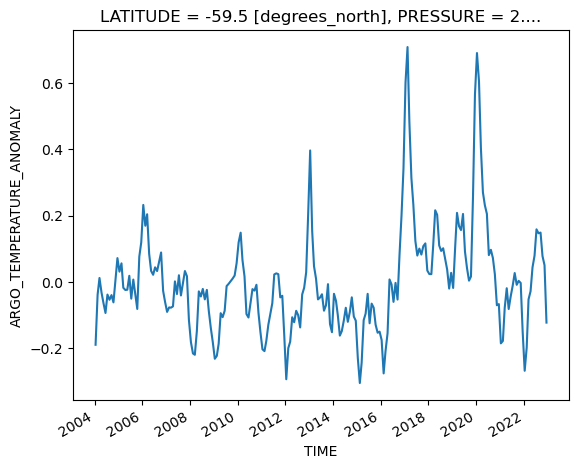

In [12]:
ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(LATITUDE=-60, method='nearest').sel(PRESSURE=0, method='nearest').mean(dim='LONGITUDE').plot()

## Define grid metrics for Argo

In [13]:
# faces of the vertical grid
zf = np.array([ 0, 5, 15., 25., 35., 45., 55., 65., 75., 85., 95., 105.,
               115., 125., 135., 145., 155., 165., 175, 190, 210., 230.,
               250., 270., 290., 310., 330., 350.,370., 390., 410., 430.,
               450, 475, 525., 575., 625., 675., 725., 775., 825., 875.,
               925., 975., 1025., 1075., 1125., 1175., 1225., 1275., 1325.,
               1375, 1450, 1550., 1650., 1750., 1850., 1950, 2000])

In [14]:
# thickness of the vertical grid cells
dzf = zf[1:] - zf[:-1]
print(dzf)
print(dzf.sum())

[  5.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  15.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  25.  50.  50.  50.  50.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  50.  50.  50.  50.  75. 100. 100. 100. 100.
 100.  50.]
2000.0


In [15]:
# horizontal grid faces
dyf = ds_RG_argo.LATITUDE*0 + 111111
dxf = ds_RG_argo.LONGITUDE*0 + 111111*np.cos(ds_RG_argo.LATITUDE*np.pi/180) 

In [16]:
metrics = { ('X',): ['dxf'],
            ('Y',): ['dyf'], 
            ('Z',):['dzf']}

In [17]:
ds_RG_argo = ds_RG_argo.assign_coords(dxf=(["LATITUDE", "LONGITUDE"], dxf.data.T),
                                      dyf=("LATITUDE", dyf.data),
                                      dzf=("PRESSURE", dzf))

In [18]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 228)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2022-12-15
    dxf                       (LATITUDE, LONGITUDE) float64 4.783e+04 ... 2.0...
    dyf                       (LATITUDE) float64 1.111e+05 ... 1.111e+05
    dzf                       (PRESSURE) float64 5.0 10.0 10.0 ... 100.0 50.0
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(6, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(6, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [19]:
argo_grid = xgcm.Grid(ds_RG_argo, coords={"X":{"center": "LONGITUDE"},
                                          "Y":{"center": "LATITUDE"},
                                            "Z":{"center": "PRESSURE"}}, metrics=metrics, periodic=['LONGITUDE'])

In [20]:
argo_grid

<xgcm.Grid>
X Axis (not periodic):
  * center   LONGITUDE
Y Axis (not periodic):
  * center   LATITUDE
Z Axis (not periodic):
  * center   PRESSURE

## Depth-time plot of temperature anomaly

In [21]:
lat_range = (-65, -50)
argo_anom_time_series = argo_grid.average(argo_grid.average(
                                ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(LATITUDE=slice(lat_range[0], lat_range[1])),
                                              'X'),'Y').load()

In [22]:
argo_anom_time_series = argo_anom_time_series.assign_attrs({'Latitude range averaged over': '({0}, {1})'.format(lat_range[0], lat_range[1])})
argo_anom_time_series = argo_anom_time_series.assign_attrs({'Note': 'Monthly climatology subtracted from original monthly anomaly data'})

In [23]:
argo_anom_time_series.to_netcdf('argo_anom_time_series.nc')

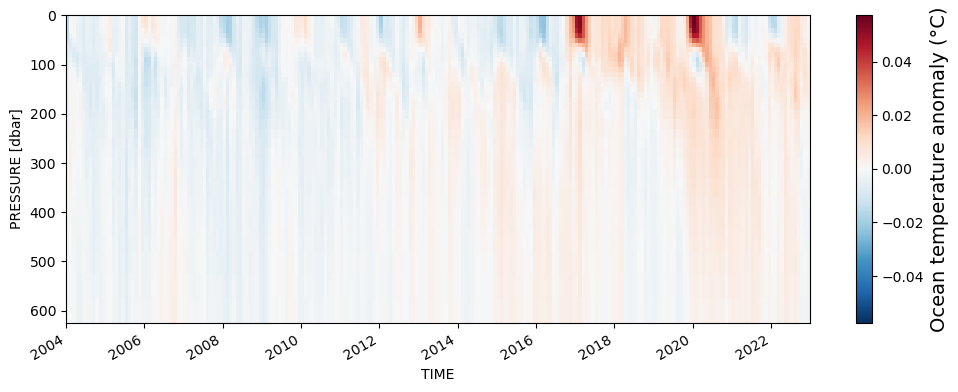

In [24]:
plt.figure(figsize=(12,4))
im = argo_anom_time_series.sel(PRESSURE=slice(0,600)).plot(y='PRESSURE', yincrease=False, add_colorbar=False)
plt
CB = plt.colorbar(im)
CB.ax.set_ylabel('Ocean temperature anomaly (°C)', fontsize=14)
plt.savefig('RG-argo-ocean-temp-anom-50-65S.png', dpi=200, bbox_inches='tight')

## Time plot

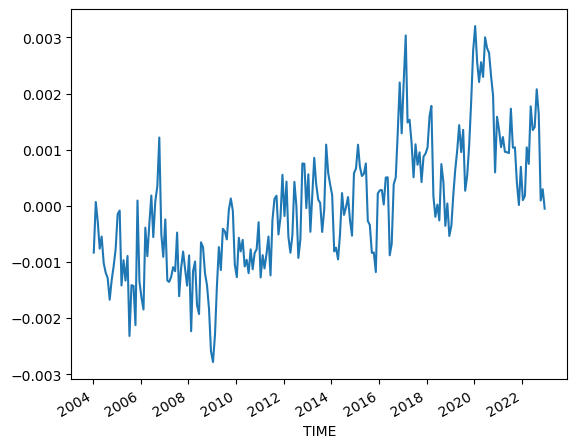

In [25]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(0,600)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-0-600m-depth.png', dpi=200, bbox_inches='tight')

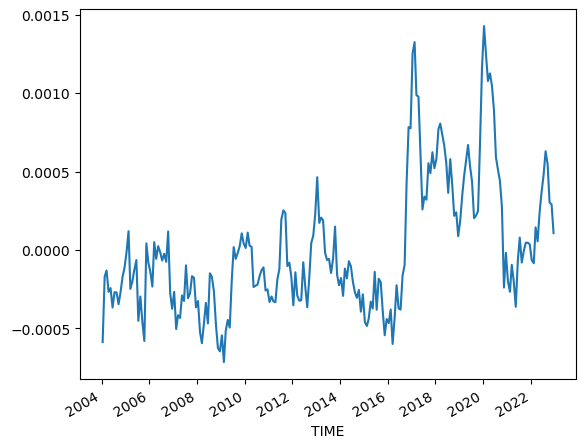

In [26]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(0,100)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-0-100m-depth.png', dpi=200, bbox_inches='tight')

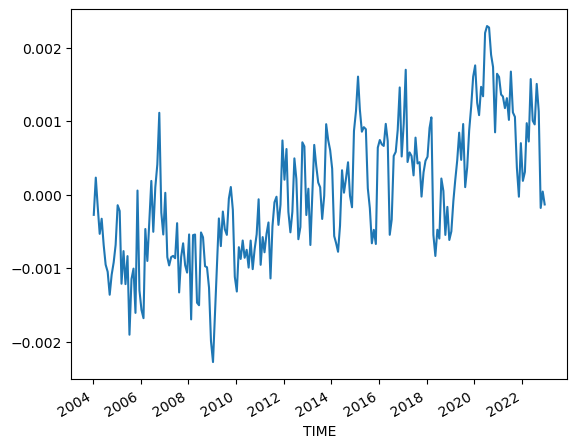

In [27]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(100,600)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-100-600m-depth.png', dpi=200, bbox_inches='tight')